In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:

# Cargar el dataset
os.chdir("C:/Users/ADMIN/Desktop/saul")
df = pd.read_csv("Retail-Supply-Chain-Sales-Analysis.csv")

#### EDA

In [ ]:
#  Explorar las columnas disponibles
print(df.columns)
df.sample(3)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Retail Sales People', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
3766,3767,CA-2016-163153,3/21/2016,3/25/2016,Standard Class,DM-12955,Dario Medina,Corporate,United States,Houston,...,Kelly Williams,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,Not,1.34,1,0.2,0.50
7021,7022,CA-2014-124737,8/23/2014,8/27/2014,Standard Class,AP-10915,Arthur Prichep,Consumer,United States,Denver,...,Anna Andreadi,FUR-FU-10003274,Furniture,Furnishings,Regeneration Desk Collection,Not,4.22,3,0.2,1.27
6564,6565,CA-2014-166086,7/5/2014,12/5/2014,Standard Class,CT-11995,Carol Triggs,Consumer,United States,Lawrence,...,Chuck Magee,OFF-AR-10002578,Office Supplies,Art,Newell 335,Not,8.64,3,0.0,2.51


In [4]:
# Tamaño del DataFrame filas y columnas
df.shape

(9994, 23)

In [5]:
# Informacion del tipo de dato del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row ID               9994 non-null   int64  
 1   Order ID             9994 non-null   object 
 2   Order Date           9994 non-null   object 
 3   Ship Date            9994 non-null   object 
 4   Ship Mode            9994 non-null   object 
 5   Customer ID          9994 non-null   object 
 6   Customer Name        9994 non-null   object 
 7   Segment              9994 non-null   object 
 8   Country              9994 non-null   object 
 9   City                 9994 non-null   object 
 10  State                9994 non-null   object 
 11  Postal Code          9994 non-null   int64  
 12  Region               9994 non-null   object 
 13  Retail Sales People  9994 non-null   object 
 14  Product ID           9994 non-null   object 
 15  Category             9994 non-null   o

In [6]:
# Validar si existen nulos en el DataFrame 
print("Existen" , df.isnull().sum().sum(), "valores null")

Existen 0 valores null


In [7]:
# Principales datos estadisticos de las columnas numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.00,2499.25,4997.500,7495.75,9994.00
Postal Code,9994.0,55190.379428,32063.693350,1040.00,23223.00,56430.500,90008.00,99301.00
Sales,9994.0,229.858022,623.245131,0.44,17.28,54.490,209.94,22638.48
Quantity,9994.0,3.789574,2.225110,1.00,2.00,3.000,5.00,14.00
Discount,9994.0,0.156203,0.206452,0.00,0.00,0.200,0.20,0.80
Profit,9994.0,28.656973,234.260203,-6599.98,1.73,8.665,29.36,8399.98


In [15]:
# Agrupar ventas por producto
ventas_por_producto = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False)
print(ventas_por_producto.head(10))

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.83
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.38
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.48
HON 5400 Series Task Chairs for Big and Tall                                   21870.57
GBC DocuBind TL300 Electric Binding System                                     19823.48
GBC Ibimaster 500 Manual ProClick Binding System                               19024.50
Hewlett Packard LaserJet 3310 Copier                                           18839.68
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.90
GBC DocuBind P400 Electric Binding System                                      17965.07
High Speed Automatic Electric Letter Opener                                    17030.31
Name: Sales, dtype: float64


In [12]:
# Agrupar ventas por región
ventas_por_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print(ventas_por_region)

Region
West       725457.93
East       678781.36
Central    501239.88
South      391721.90
Name: Sales, dtype: float64


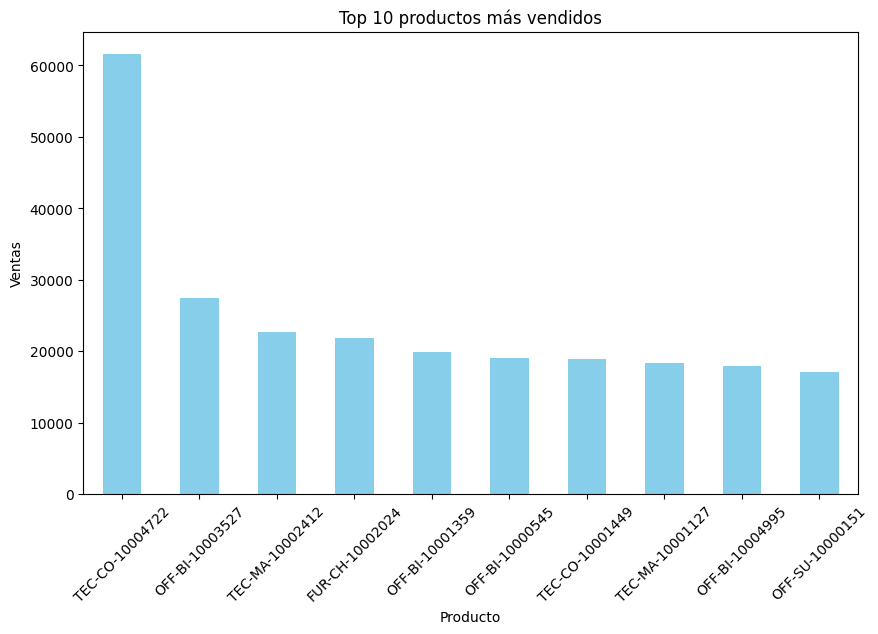

In [13]:
# Visualización: Top 10 productos más vendidos
plt.figure(figsize=(10,6))
ventas_por_producto.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.show()

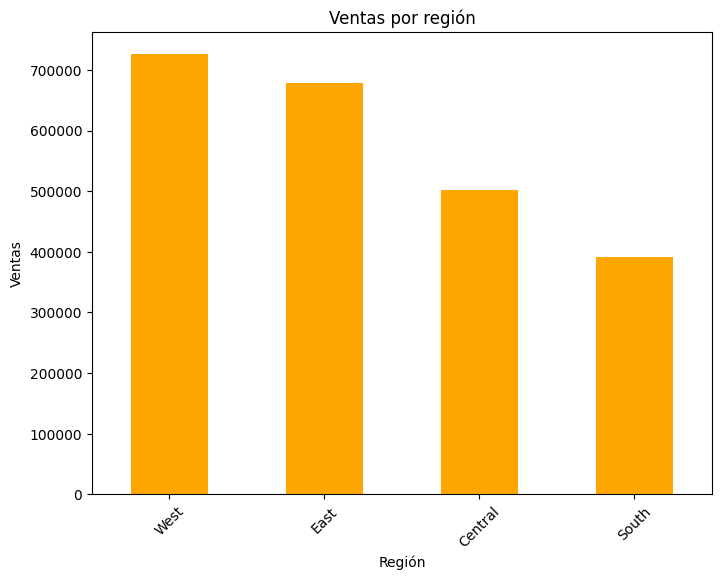

In [14]:
# Visualización: Ventas por región
plt.figure(figsize=(8,6))
ventas_por_region.plot(kind="bar", color="orange")
plt.title("Ventas por región")
plt.xlabel("Región")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.show()

##### Conclusión 
Los gráficos muestran qué productos generan mayor volumen de ventas y en qué regiones se concentran.  
Esto ayuda a la empresa a **priorizar inventario y logística** en las zonas de mayor demanda.  
También permite identificar productos estratégicos para campañas de marketing o promociones.